Creates a Exploratory Data Analysis of the output file using RyR Generator

In [1]:
#% pip install openpyxl
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import sys
sys.path.append("../tools/")
import _db_tools as db

#Helper functions
def prepare_data(target):
    data = pd.read_excel(target) #Import the RyR generator output
    df = data.iloc[2:, 1:-2] #Slices the measures
    df.reset_index(drop=True, inplace=True) #Reset rows index
    df.columns = range(df.shape[1]) #Reset columns index
    dbh.store_df(df, "measures") #Store the dataframe in the connected database
    dbh.consult_tables() #Checks results

def plot_scatter(df, title=None, xlabel=None, ylabel=None, legend_label=None, filter=None):
    """Plots a dataframe into a scatter plot using one of the dimensions of the colous measurement. 
    Optionally filters the plot by filter colour axis"""
    i = 0  # Counter used for the fiber number in the legend
    if filter == 'x':  # Guide selector (filter) using strings
        for index, row in df.iterrows():
            if index % 2 != 0:
                i += 1
                plt.scatter(
                    list(element + 1 for element in list(range(df.shape[1]))),
                    df.iloc[index],
                    label=legend_label + f'{i}' if legend_label else None,
                )
    elif filter == 'y':
        for index, row in df.iterrows():
            if index % 2 == 0:
                i += 1
                plt.scatter(
                    list(element + 1 for element in list(range(df.shape[1]))),
                    df.iloc[index],
                    label=legend_label + f'{i}' if legend_label else None,
                )
    elif filter == None: # Plots all fibers
        for index, row in df.iterrows():
            i += 1
            plt.scatter(
                list(element + 1 for element in list(range(df.shape[1]))),
                df.iloc[index],
                label=legend_label + f'{i}' if legend_label else None,
            )
    elif isinstance(filter, int):
        fibers = [filter]
        for fiber in fibers:
            plt.scatter(
            list(element + 1 for element in list(range(df.shape[1]))),
            df.iloc[fiber-1],
            label=legend_label + f'{fiber}' if legend_label else None,
            )
    elif isinstance(filter, (list, tuple)):
        fibers = filter
        for fiber in fibers:
            plt.scatter(
            list(element + 1 for element in list(range(df.shape[1]))),
            df.iloc[fiber-1],
            label=legend_label + f'{fiber}' if legend_label else None,
            )
    plt.title(title) if title else None
    plt.xlabel(xlabel) if xlabel else None
    plt.ylabel(ylabel) if ylabel else None
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') if legend_label else None
    plt.show()

../database/database.db found.
Dataframe stored as *measures*
../database/database.db actual contents:
    measures
Table measures retrieved succesfully.


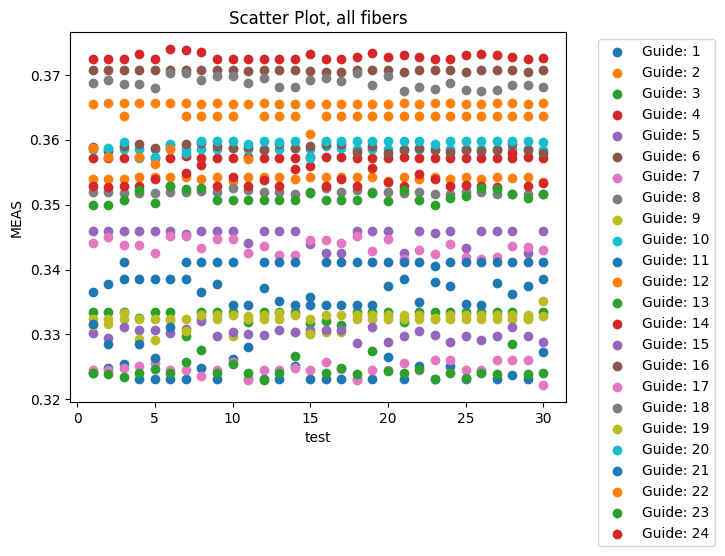

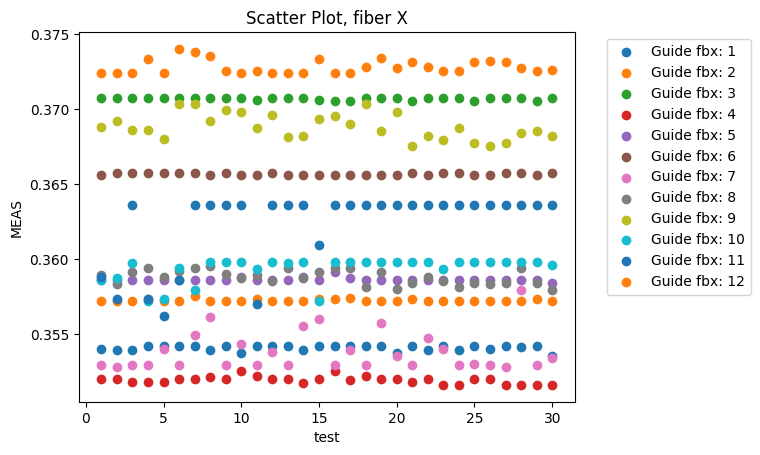

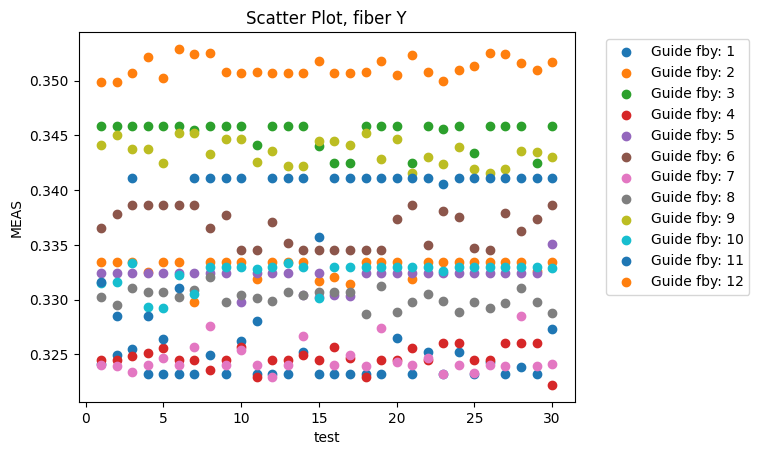

In [2]:
dbh = db.SQLite_Data_Extractor("database.db")
prepare_data("../data/target.xlsx")
df = dbh.retrieve("measures")
plot_scatter(df, 'Scatter Plot, all fibers', 'test', 'MEAS', 'Guide: ')
plot_scatter(df, 'Scatter Plot, fiber X', 'test', 'MEAS', 'Guide fbx: ', filter='x')
plot_scatter(df, 'Scatter Plot, fiber Y', 'test', 'MEAS', 'Guide fby: ', filter='y')

In [3]:
df #Shows the df in jupyter format

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.3241,0.3249,0.3255,0.3232,0.3232,0.3232,0.3232,0.3249,0.3232,0.3262,...,0.3232,0.3252,0.3232,0.3252,0.3232,0.3243,0.3232,0.3238,0.3232,0.3273
1,0.3540,0.3539,0.3539,0.3542,0.3542,0.3542,0.3542,0.3539,0.3542,0.3537,...,0.3542,0.3539,0.3542,0.3539,0.3542,0.3540,0.3542,0.3541,0.3542,0.3535
2,0.3334,0.3334,0.3334,0.3325,0.3334,0.3334,0.3298,0.3334,0.3334,0.3334,...,0.3319,0.3334,0.3334,0.3334,0.3334,0.3334,0.3334,0.3334,0.3326,0.3334
3,0.3572,0.3572,0.3572,0.3573,0.3572,0.3572,0.3575,0.3572,0.3572,0.3572,...,0.3573,0.3572,0.3572,0.3572,0.3572,0.3572,0.3572,0.3572,0.3573,0.3572
4,0.3459,0.3459,0.3459,0.3459,0.3459,0.3459,0.3455,0.3459,0.3459,0.3459,...,0.3425,0.3459,0.3456,0.3459,0.3434,0.3459,0.3459,0.3459,0.3425,0.3459
5,0.3707,0.3707,0.3707,0.3707,0.3707,0.3707,0.3707,0.3707,0.3707,0.3707,...,0.3705,0.3707,0.3707,0.3707,0.3705,0.3707,0.3707,0.3707,0.3705,0.3707
6,0.3245,0.3245,0.3248,0.3251,0.3256,0.3245,0.3245,0.3236,0.3245,0.3257,...,0.3256,0.3245,0.3260,0.3260,0.3245,0.3245,0.3260,0.3260,0.3260,0.3222
7,0.3520,0.3520,0.3518,0.3518,0.3518,0.3520,0.3520,0.3521,0.3520,0.3525,...,0.3518,0.3520,0.3516,0.3516,0.3520,0.3520,0.3516,0.3516,0.3516,0.3516
8,0.3324,0.3324,0.3324,0.3324,0.3324,0.3324,0.3324,0.3324,0.3324,0.3298,...,0.3324,0.3324,0.3324,0.3324,0.3324,0.3324,0.3324,0.3324,0.3324,0.3351
9,0.3586,0.3586,0.3586,0.3586,0.3586,0.3586,0.3586,0.3586,0.3586,0.3588,...,0.3586,0.3586,0.3586,0.3586,0.3586,0.3586,0.3586,0.3586,0.3586,0.3584


In [4]:
resume = df.transpose().describe() #Transpose the df first due to describe() working in columns.
df.transpose().describe() #This second call allows for a nicer output in jupiter.

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.324023,0.354067,0.332957,0.357237,0.345217,0.370660,0.324740,0.351930,0.332200,0.358627,...,0.330170,0.358783,0.343503,0.36880,0.332443,0.359343,0.338487,0.362297,0.351200,0.372797
std,0.001201,0.000194,0.000863,0.000072,0.001254,0.000077,0.000959,0.000239,0.000933,0.000111,...,0.000799,0.000488,0.001146,0.00085,0.001156,0.000841,0.004983,0.002506,0.000857,0.000467
min,0.323200,0.353500,0.329800,0.357200,0.342500,0.370500,0.322200,0.351600,0.329800,0.358400,...,0.328700,0.357900,0.341600,0.36750,0.329200,0.357200,0.326400,0.356200,0.349900,0.372400
25%,0.323200,0.353900,0.332800,0.357200,0.345525,0.370700,0.324500,0.351800,0.332400,0.358600,...,0.329800,0.358400,0.342525,0.36820,0.332650,0.359325,0.340725,0.363600,0.350700,0.372400
50%,0.323200,0.354200,0.333400,0.357200,0.345900,0.370700,0.324500,0.352000,0.332400,0.358600,...,0.330200,0.358800,0.343600,0.36865,0.333000,0.359800,0.341100,0.363600,0.350800,0.372550
75%,0.324900,0.354200,0.333400,0.357275,0.345900,0.370700,0.325600,0.352000,0.332400,0.358600,...,0.330700,0.359175,0.344500,0.36945,0.333000,0.359800,0.341100,0.363600,0.351800,0.373100
max,0.327300,0.354200,0.333400,0.357500,0.345900,0.370700,0.326000,0.352500,0.335100,0.359100,...,0.332100,0.359500,0.345200,0.37030,0.333300,0.359800,0.341100,0.363600,0.352900,0.374000


In [5]:
largest = resume.loc['std'].sort_values(ascending=False)[:5]  #Filter the 5 largest values
index = largest.index.tolist()  #Get the index in a list format
for i in range(largest.shape[0]): #Differentiate between x-fibers (odds) and y-fibers
    if index[i] % 2 == 0:
        index[i] = f"fiber x {index[i]+1}:"
    else:
        index[i] = f"fiber y {index[i]+1}:"
largest.index = index
print("Fibers with largest deviation:")
print(largest)

Fibers with largest deviation:
fiber x 21:    0.004983
fiber y 22:    0.002506
fiber x 11:    0.001709
fiber x 13:    0.001691
fiber y 14:    0.001303
Name: std, dtype: float64


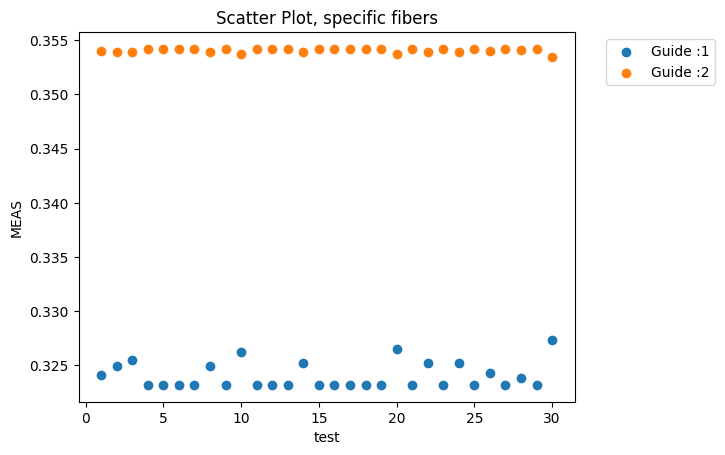

In [7]:
plot_scatter(df, 'Scatter Plot, specific fibers', 'test', 'MEAS', 'Guide :', filter=[1, 2])